<a href="https://colab.research.google.com/github/rontalapoojareddy/DeepLearning1/blob/main/Assignmnet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install diffusers transformers torch accelerate pillow matplotlib


In [6]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load pretrained model
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter text description for image generation: pens
How many images to generate?: 4


  0%|          | 0/50 [00:00<?, ?it/s]

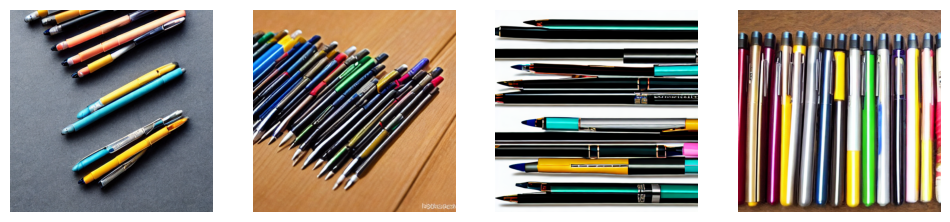

In [8]:
# -------- DYNAMIC USER INPUT --------
prompt = input("Enter text description for image generation: ")

num_images = int(input("How many images to generate?: "))

# Generate images
result = pipe(
    prompt,
    num_images_per_prompt=num_images
)

images = result.images

# Display images
plt.figure(figsize=(12, 6))
for i, img in enumerate(images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(img)
    plt.axis("off")
    img.save(f"generated_{i}.png")

plt.show()